In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [80]:
game_df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016 2.csv')
game_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
game_df.columns


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [84]:
# How many nulls?
game_df.isna().sum()


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [86]:
## What are the data types?
print(game_df.dtypes)

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object


In [88]:
#Check the duplicate
game_df.duplicated().sum()

0

In [90]:
# check the unique values in the Genre column?
unique_values = game_df['Genre'].unique()
unique_values

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [92]:
# check the unique values in the User_score column?
game_df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [94]:
#The value 'tbd' is encountered. Because of this, the column is of type object. So I need to change 'tbd' to 'nan'.
game_df['User_Score'] = game_df['User_Score'].replace('tbd', np.nan)

In [96]:
#Game Platform
game_df["Platform"].value_counts()

PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [98]:
game_df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [100]:
game_df['Rating'].unique()
#"EC" ("Early childhood") - "For Young Children"
#“E” (“Everyone”) - “For everyone”
#“E10 +” (“Everyone 10 and older”) - “For everyone 10 and older”: Projects with this rating may contain a little more cartoon or soft violence, or slightly explicit scenes or a minimum amount of blood. The rating was adopted by the ESRB on March 2, 2005. The first game to receive this rating was Donkey Kong: Jungle Beat.
#"T" ("Teen") - "Teens": This game is suitable for people aged 13 and over. Projects in this category may contain violence, obscene scenes, crude humor, moderately explicit sexual content, gore, or infrequent use.
#"M" ("Mature") - "For Adults": The game content is not suitable for teenagers under 17 years of age. Projects with this rating may contain quite violent violence, a large amount of gore with dismemberment, obscene sex scenes or gross profanity that is undesirable for a younger audience.
#"AO" ("Adults Only 18 +") - "Adults Only": Game content is only for adults over 18 years of age. Products in this category may contain prolonged violent and / or highly explicit sexual content, as well as nude scenes. Most of these games are designed for personal computers running Microsoft Windows and Apple Macintosh. The "Adults Only" rating is the subject of much debate, as it imposes serious restrictions on the sale of the game.
#"RP" ("Rating Pending") - "Rating Pending": The product has been submitted to ESRB and is pending a rating. This logo is used only on promotional presentations and in demo versions of games before the official release date.

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [102]:
#It is necessary to rename K-A toE. RP - also equate to Nan, similar to tbd.
game_df['Rating'] = game_df['Rating'].replace('K-A', 'E').fillna('RP')

In [104]:
#fill the null value with 'unkown'
game_df['Name'] = game_df['Name'].fillna('unknown')

In [106]:
#The value 'tbd' is encountered. Because of this, the column is of type object. So I need to change 'tbd' to 'nan'.
game_df['User_Score'] = game_df['User_Score'].replace('tbd', np.nan)

In [108]:
# For the convenience of work, change the user_score score will be reduced to100-point. 
game_df['User_Score'] = game_df['User_Score'].astype('float64')
game_df['User_Score'] = game_df['User_Score'].apply(lambda x: x*10)
game_df['User_Score'] = game_df['User_Score'].replace(-10,-1)

#Change the data type to integer
columns_to_int = ['Year_of_Release', 'Critic_Score', 'User_Score']
for column in columns_to_int:
    game_df[column] = game_df[game_df[column].notna()][column].astype('int64')
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16719 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           16719 non-null  object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [110]:
game_df['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [112]:
#Fill the Null values with 0 in Year_of_Release columns
#game_df['Year_of_Release'] = game_df['Year_of_Release']
#print('Nan in the Year_of_Release to {}'.format( game_df['Year_of_Release'].isna().sum()))

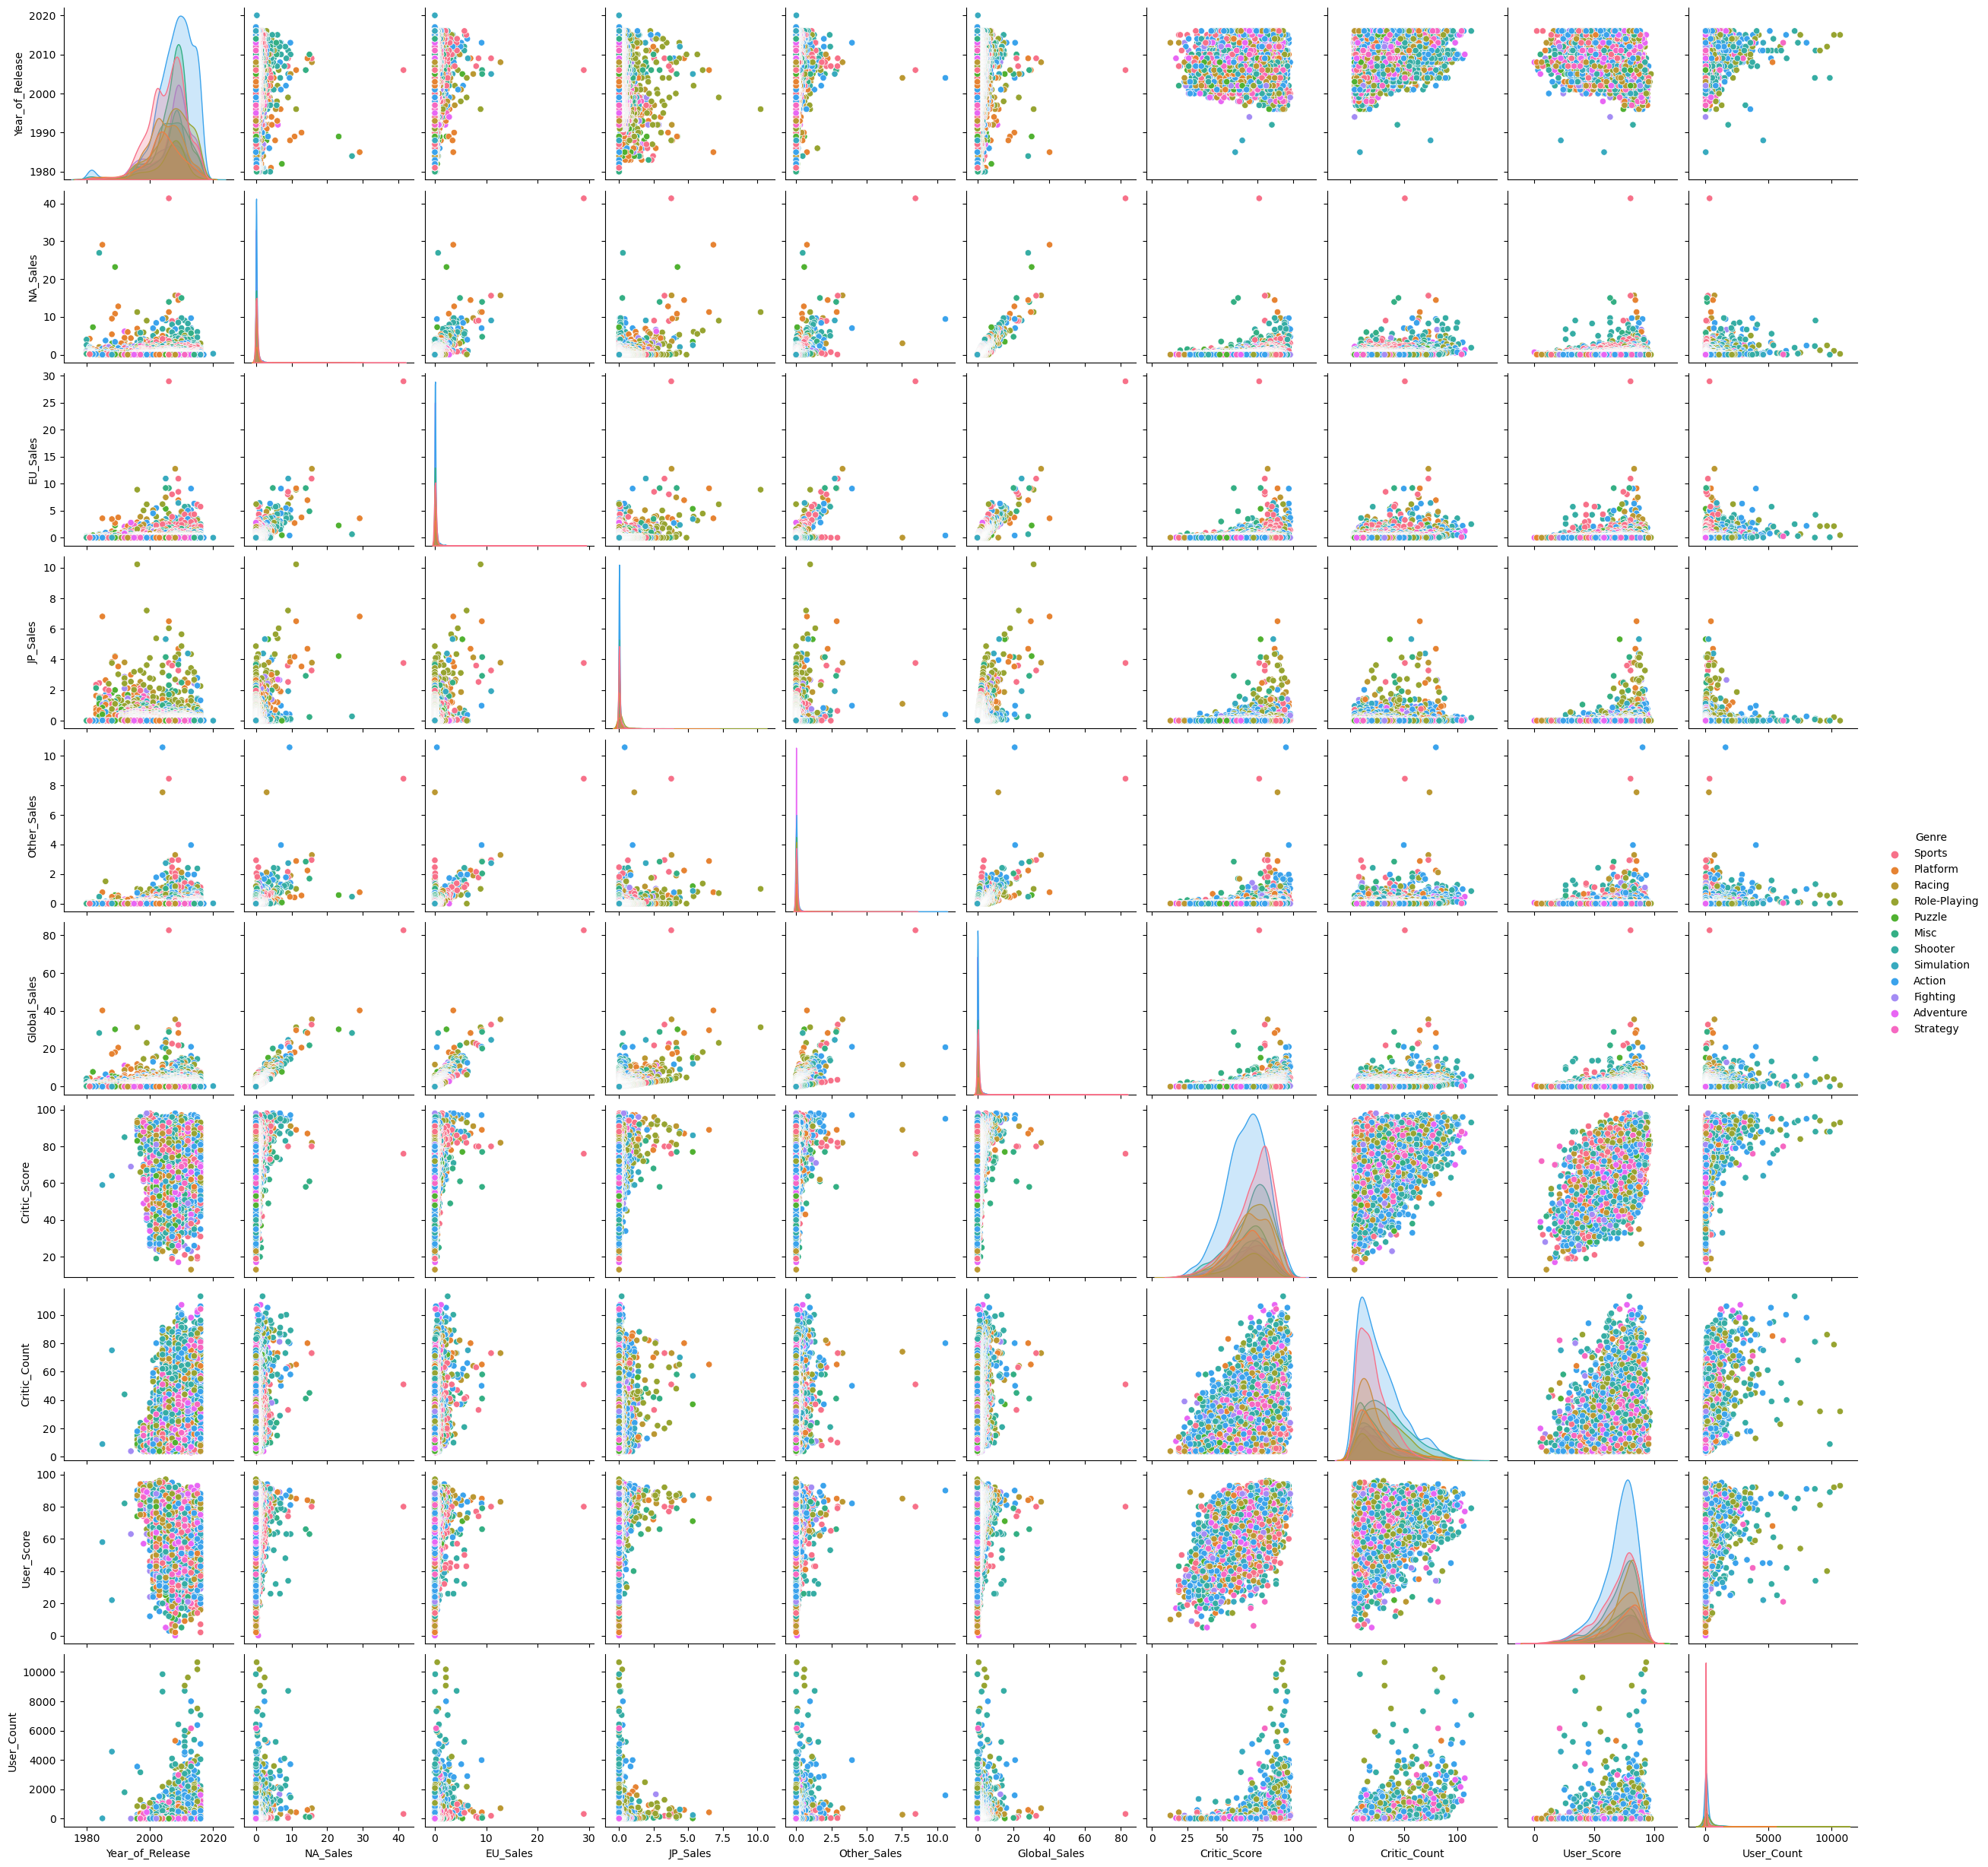

In [116]:
#Create a pairplot for the DataFrame
sns.pairplot(game_df, hue = 'Genre')
plt.show()

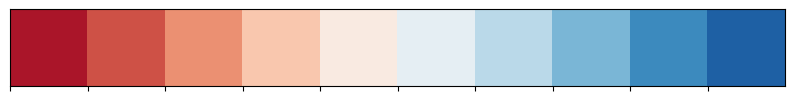

In [117]:
diverging_colors = sns.color_palette("RdBu", 10)
sns.palplot(diverging_colors)

In [119]:
#Area plot to see the precentage of sales of each genre over the years.
genre_sales_percentages_by_year = (game_df.groupby(['Year_of_Release', 'Genre']).Global_Sales.sum())*(100)/game_df.groupby(['Year_of_Release']).Global_Sales.sum()


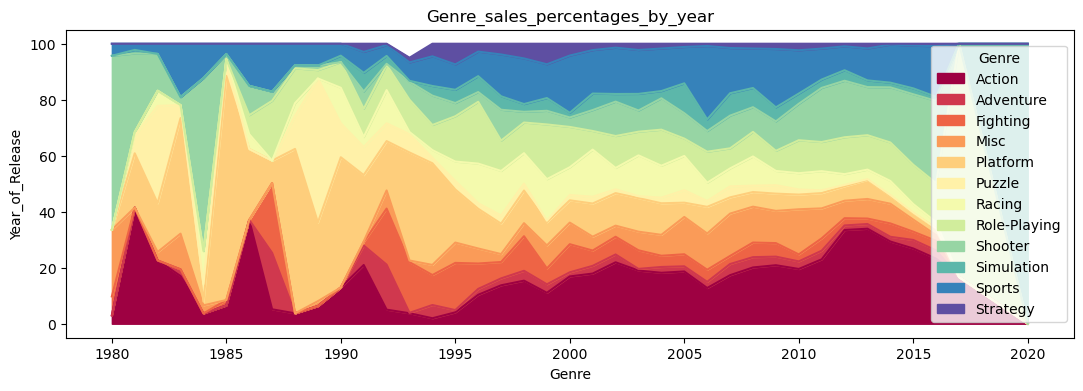

In [120]:

genre_sales_percentages_by_year.unstack().plot(
    kind='area', 
    stacked=True,
    colormap= 'Spectral',
    grid=False,
    figsize=(13, 4)
)
plt.xlabel('Genre')
plt.ylabel('Year_of_Release')
plt.title('Genre_sales_percentages_by_year')
plt.show()

<Axes: xlabel='Year_of_Release'>

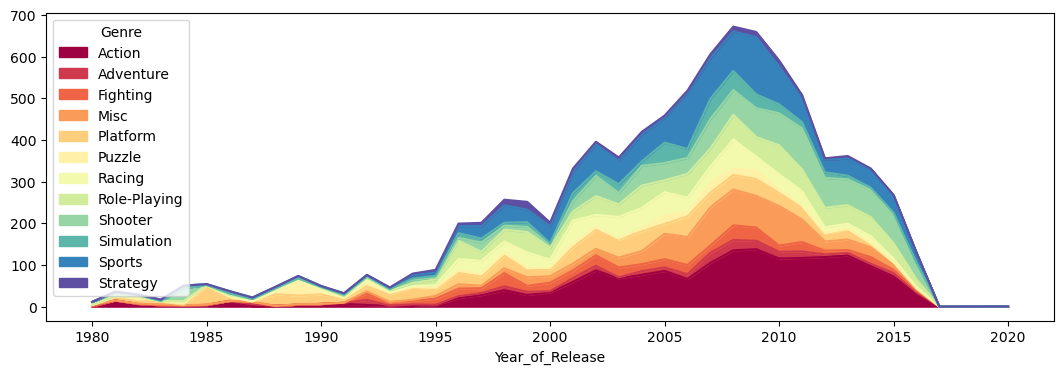

In [147]:
yearlySales = game_df.groupby(['Year_of_Release','Genre']).Global_Sales.sum()
yearlySales.unstack().plot(
    kind='area',
    stacked=True, 
    colormap= 'Spectral', 
    figsize=(13, 4) )

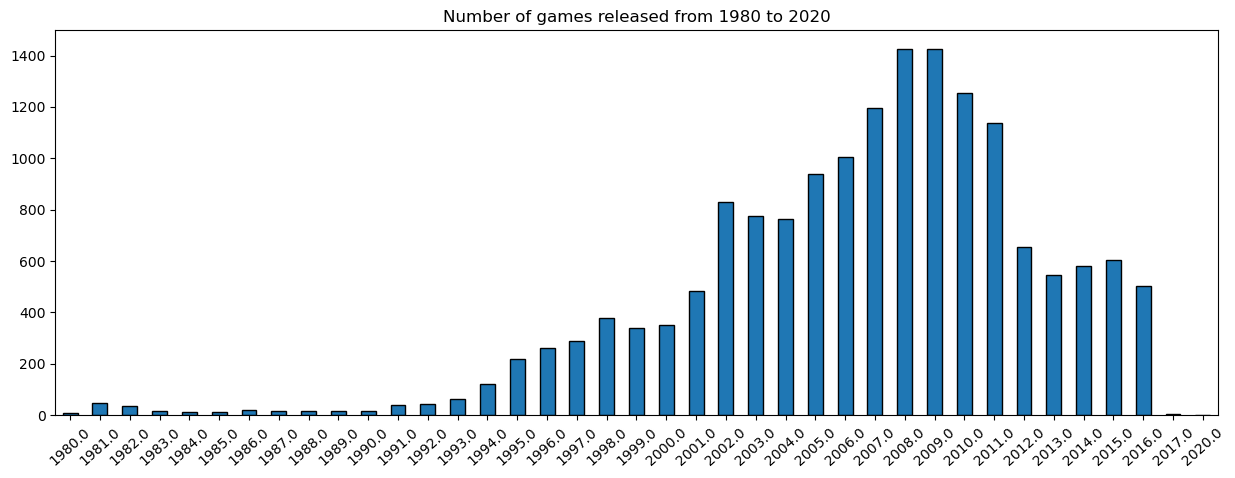

In [145]:
game_df.groupby('Year_of_Release')['Name'].count().plot(
    kind='bar',
    y='Name', 
    figsize=(15,5), 
    edgecolor='black'
)
plt.title('Number of games released from 1980 to 2020')
plt.xticks(rotation=42)
plt.xlabel('')
plt.show()

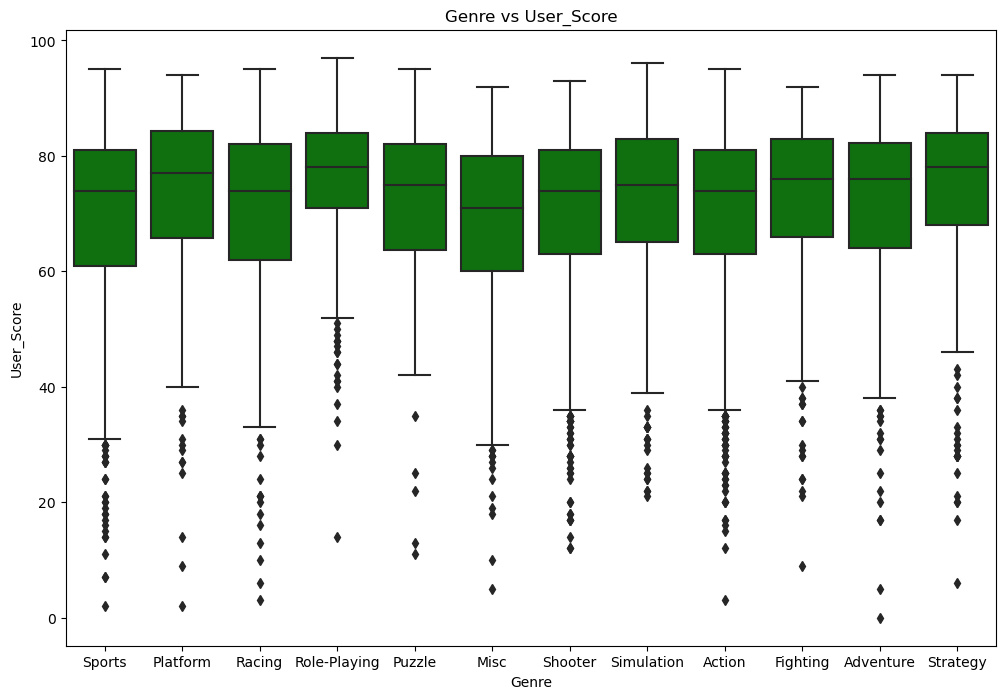

In [139]:
#Using boxplot to see User Score
plt.figure(figsize=(12, 8))  
sns.boxplot(data=game_df, x='Genre', y='User_Score', color='green')
plt.xlabel('Genre')
plt.ylabel('User_Score')
plt.title('Genre vs User_Score')
plt.show()


In [181]:
#TOP 10 Platform in Sales
game_df.groupby('Platform')['Global_Sales'].sum().to_frame(
                'Global_Sales').sort_values(
            by='Global_Sales', ascending=False).head(10)


,Global_Sales
Platform,
PS2,1255.64
X360,971.63
PS3,939.43
Wii,908.13
DS,807.10
PS,730.68
GBA,318.50
PS4,314.23
PSP,294.30


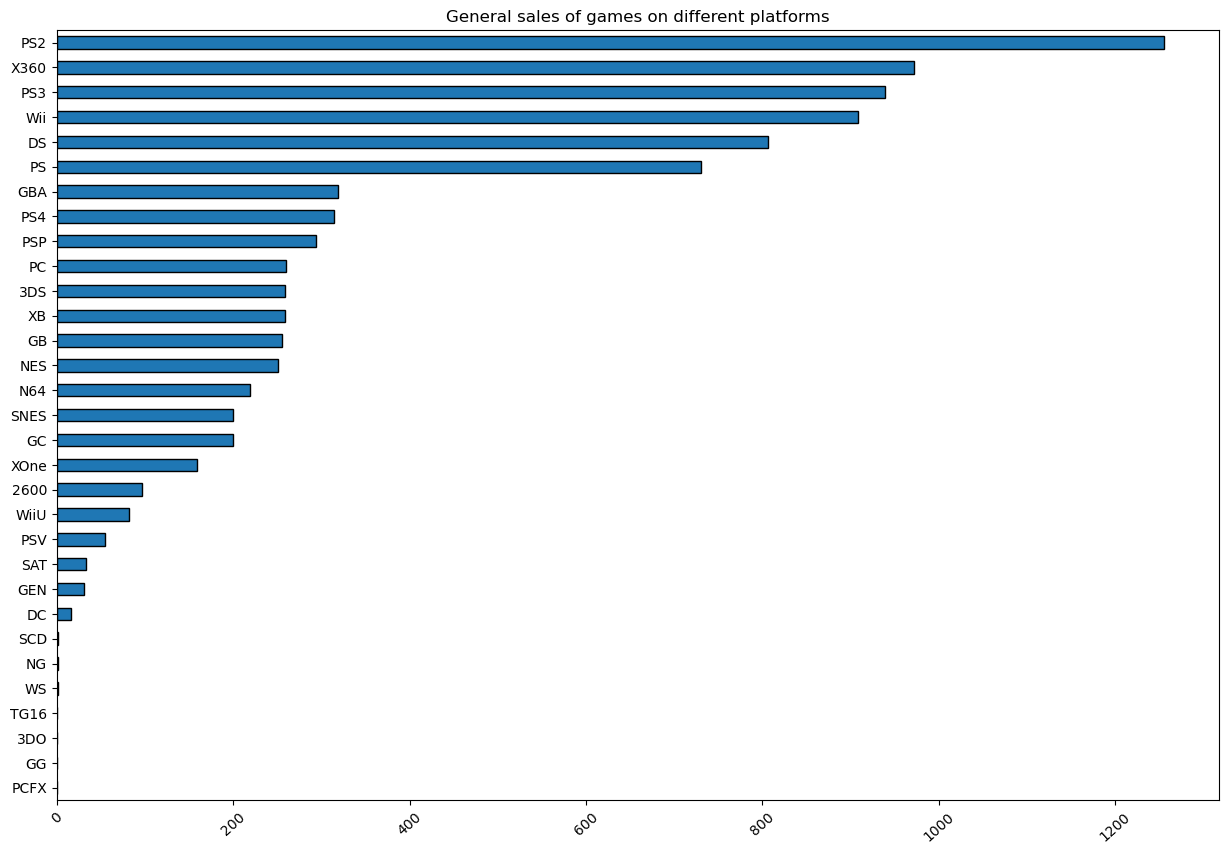

In [143]:
#General Sales of games on differrent platforms

game_df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=True).plot(
            kind='barh', y='Global_Sales', figsize=(15,10), edgecolor='black'
)
plt.title('General sales of games on different platforms')
plt.xticks(rotation=42)
plt.xlabel('')
plt.ylabel('')
plt.show()

In [198]:
#Create game life time columns 
list_of_platform = ['PS4', 'PC', '3DS', 'XOne']
games_not_new = game_df.query('Platform not in @list_of_platform').copy()
born_year = game_df.groupby('Platform')['Year_of_Release'].agg(min)
deadline = game_df.groupby('Platform')['Year_of_Release'].agg(max)
life_time = deadline - born_year
life_time.to_dict()
game_df['life_time'] = game_df['Platform'].map(life_time)
game_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,life_time
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,80.0,322.0,Nintendo,E,10.0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,RP,11.0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,83.0,709.0,Nintendo,E,10.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,80.0,192.0,Nintendo,E,10.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,RP,13.0


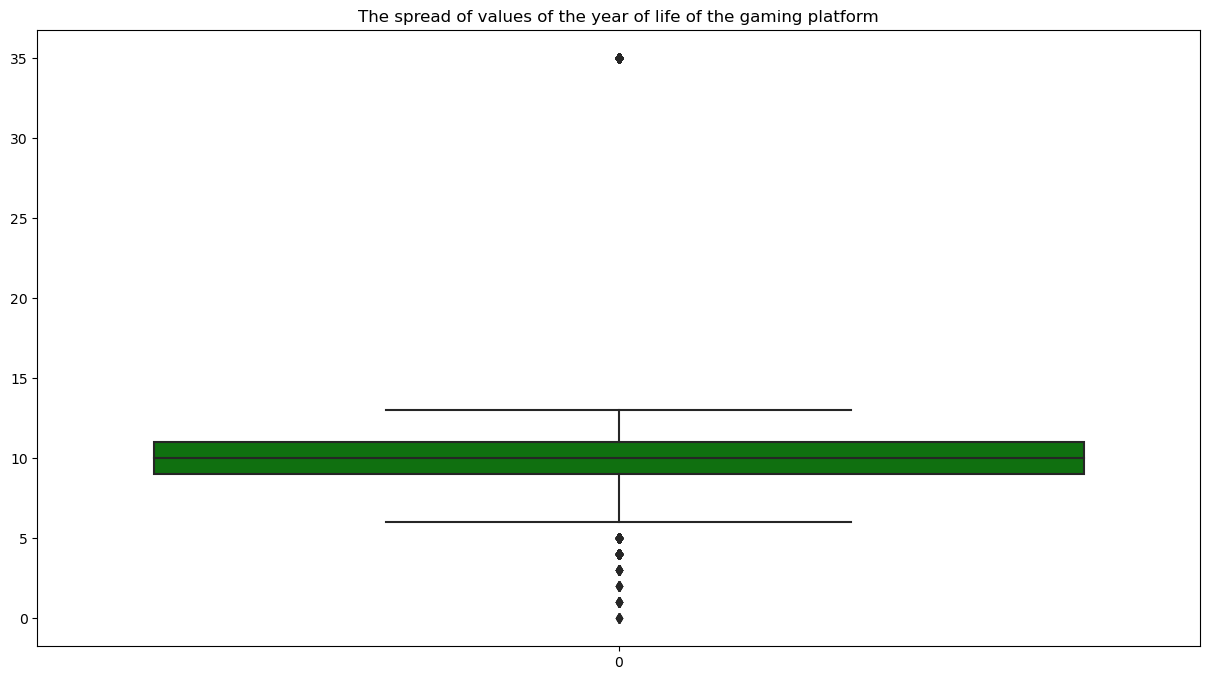

In [179]:
q75 = games_not_new['life_time'].quantile([.75])# calculate 75th percentile
q25 = games_not_new['life_time'].quantile([.25])# calculate 25th percentile
iqr = q75 - q25 #Calculate Interquartile range
low_range = q25 - (1.5 * iqr)
high_range = q75 + (1.5 * iqr)
plt.figure(figsize=(15, 8))
sns.boxplot(games_not_new['life_time'], color='green')
plt.xlim = (low_range, high_range)
plt.title('The spread of values of the year of life of the gaming platform')
plt.xlabel('')
plt.show()

#Most of game life time is between 5 and 15.

In [202]:
#Creat pivot chart to see what platform life time are between 5 and 15 years
games_pivot = games_not_new.query('5 <= life_time <=15 ').pivot_table(index='Platform', 
                         values='life_time').sort_values(
                         by='life_time', ascending=False
                        )
games_pivot.head(10)

,life_time
Platform,
GB,13.0
PS2,11.0
X360,11.0
NES,11.0
PSP,11.0
PS3,10.0
Wii,10.0
DC,10.0
SNES,9.0


In [204]:
print('Median platform lifetime: ', games_pivot['life_time'].median(), 'years')
print('Average platform lifetime: {:.1f}'.format(games_pivot['life_time'].mean()), 'years')

Median platform lifetime:  9.0 years
Average platform lifetime: 8.9 years


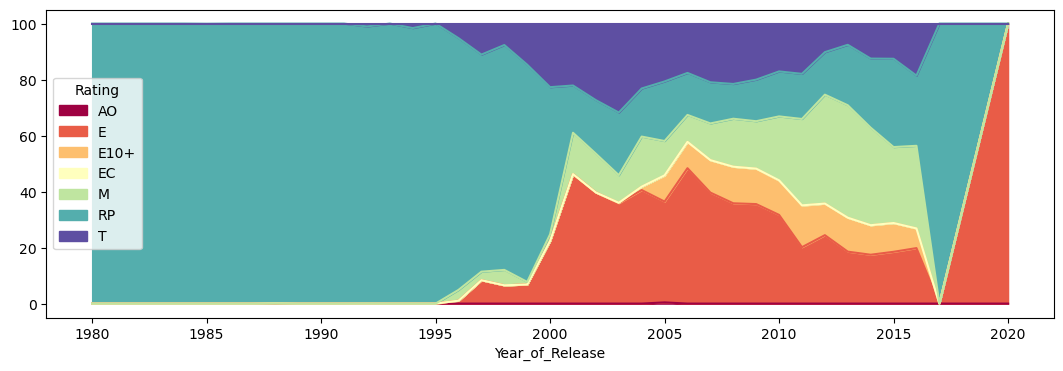

In [214]:
#Rating Sales Evolution
rating_sales_percentages_by_year = (game_df.groupby(['Year_of_Release', 'Rating']).Global_Sales.sum())*(100)/game_df.groupby(['Year_of_Release']).Global_Sales.sum()
rating_sales_percentages_by_year.unstack().plot(kind='area',stacked=True, colormap= 'Spectral', figsize=(13, 4));
#The rating system start around 1995